In [1]:
from torch import nn , save , load
import torchvision
import torch
import numpy as np
from tqdm.notebook import tqdm
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [2]:
import os
import cv2
import numpy as np

try:
    os.remove("dataset/README")
except:
    print("README not found")

README not found


In [3]:
def show_image(image):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    # plt.set_title(label)
    plt.axis('off')  # Turn off axis labels
    plt.show()

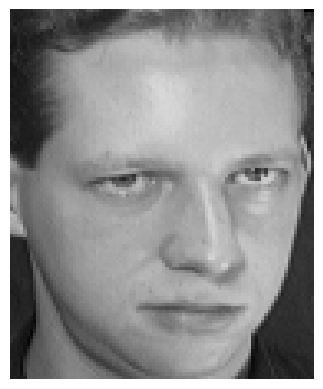

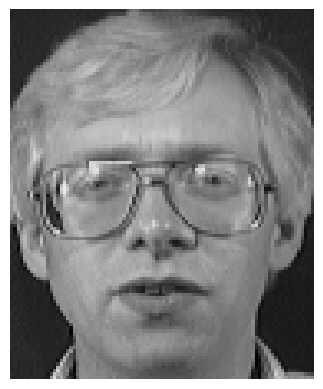

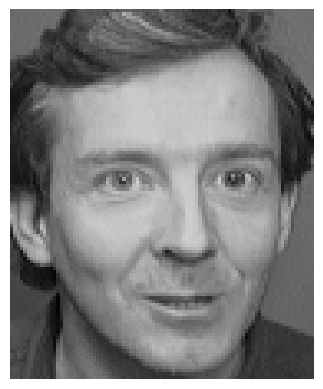

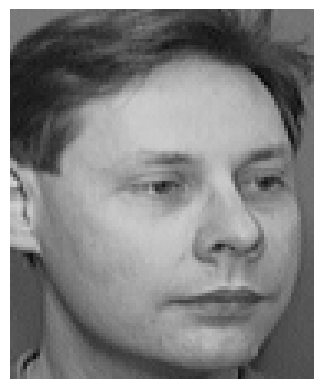

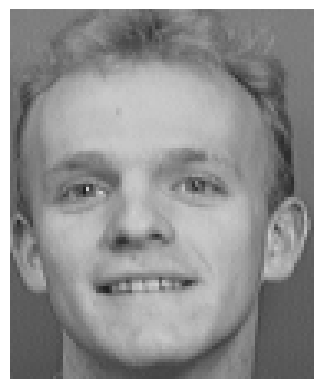

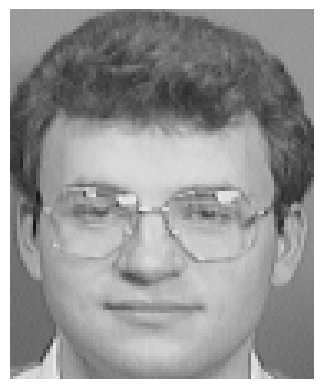

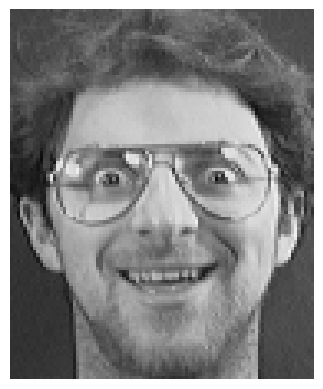

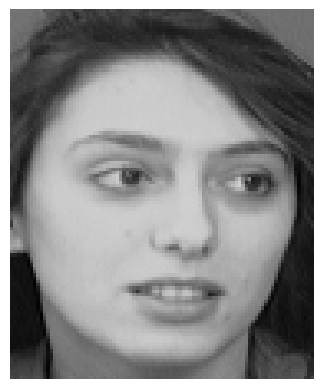

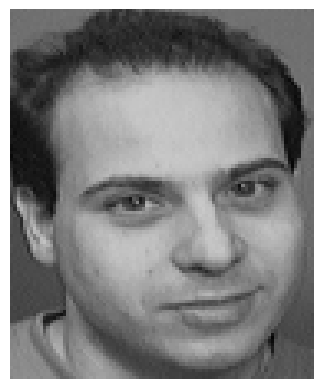

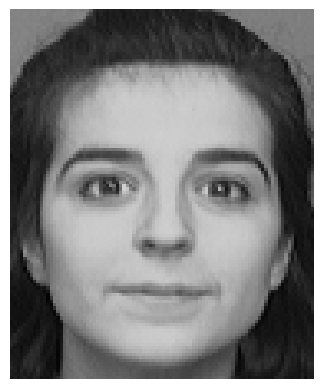

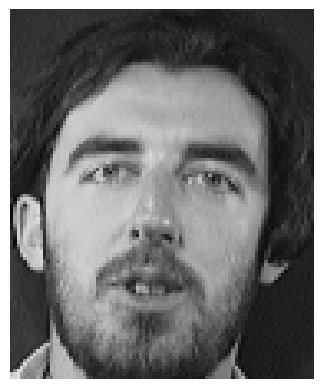

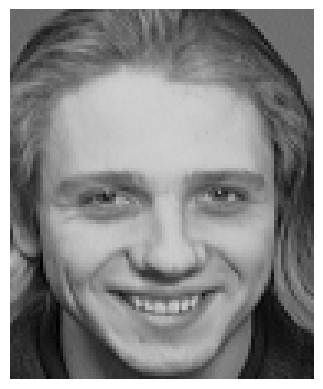

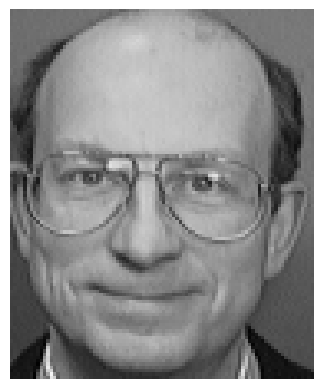

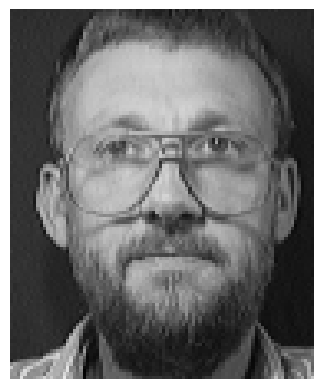

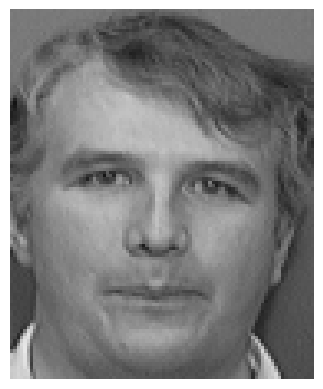

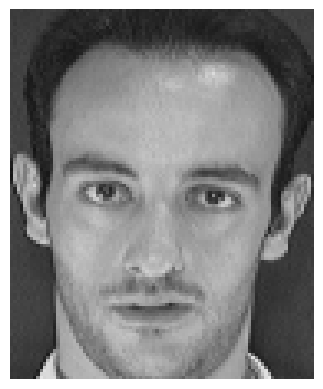

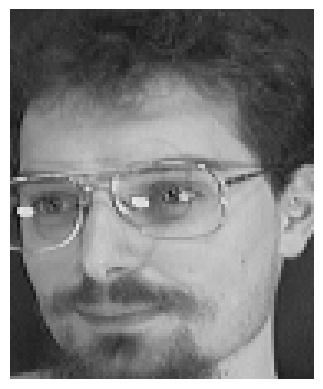

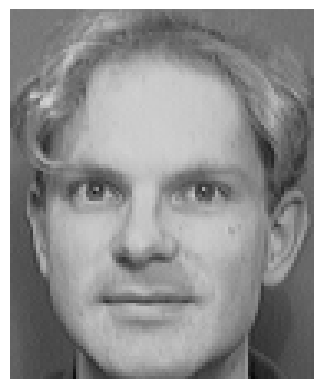

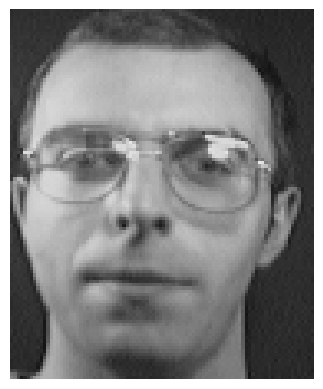

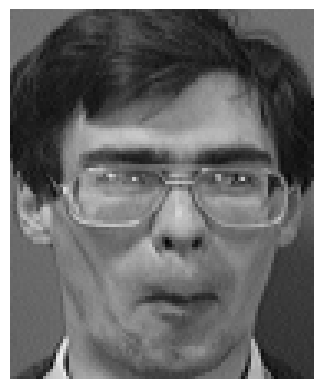

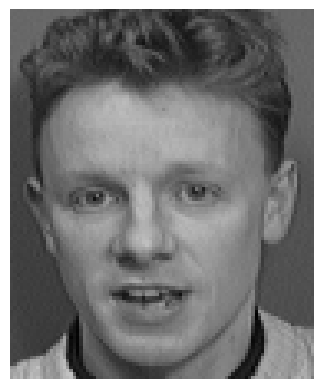

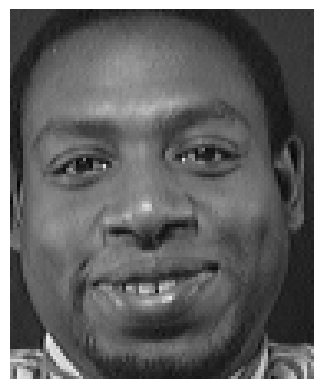

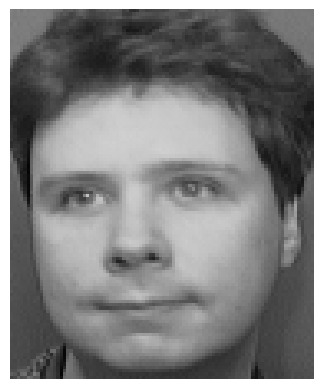

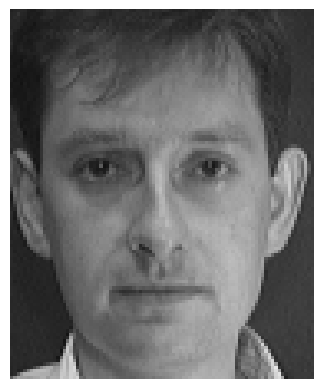

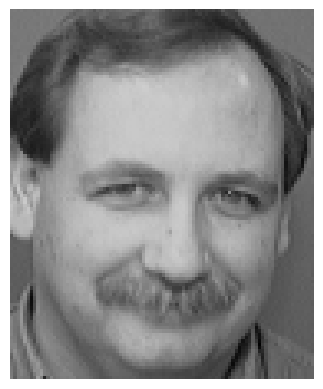

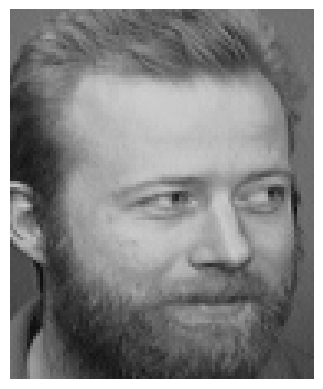

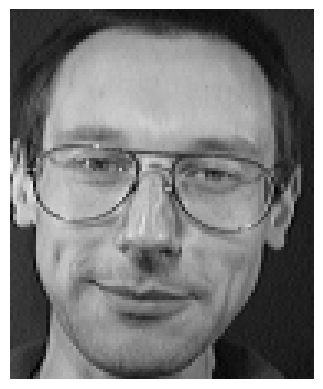

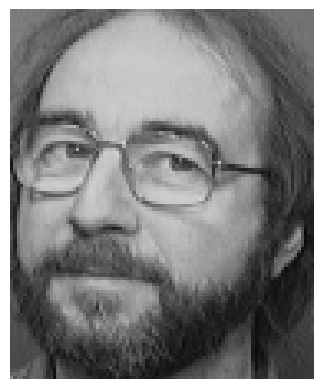

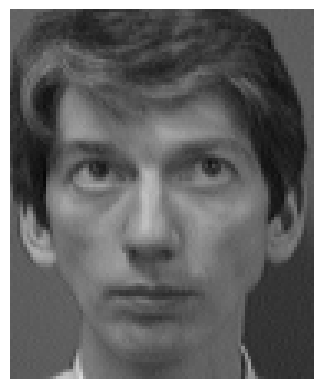

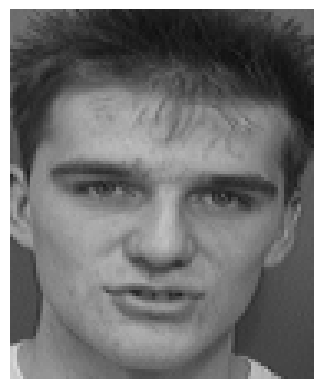

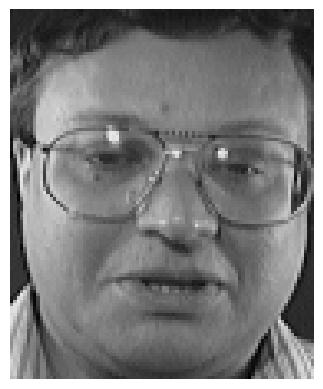

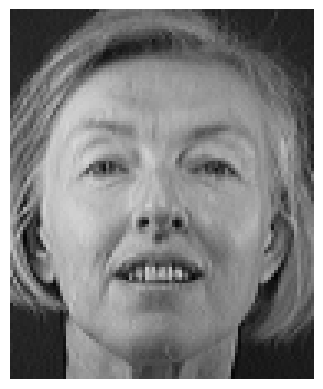

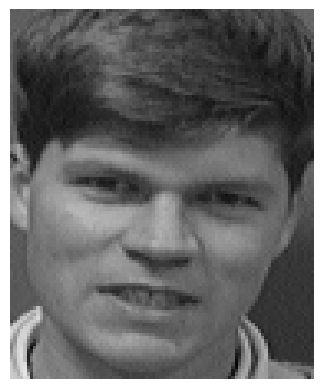

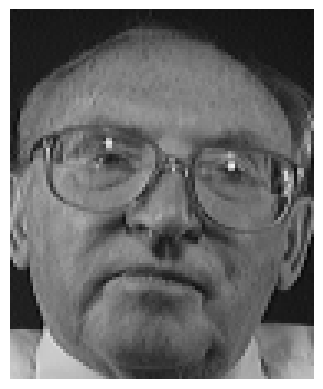

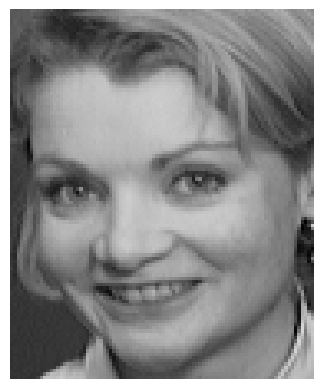

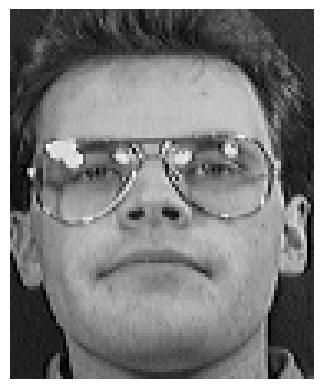

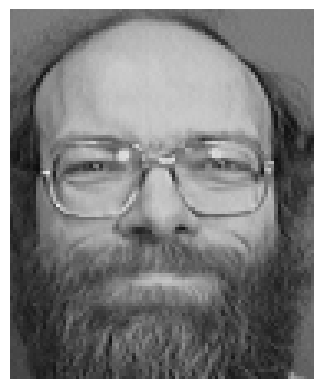

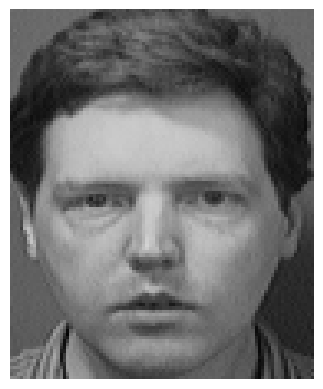

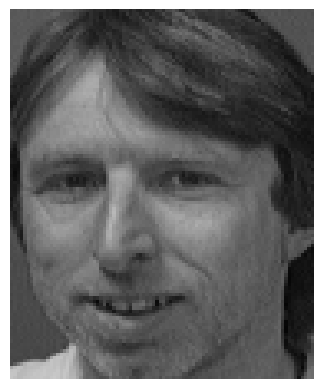

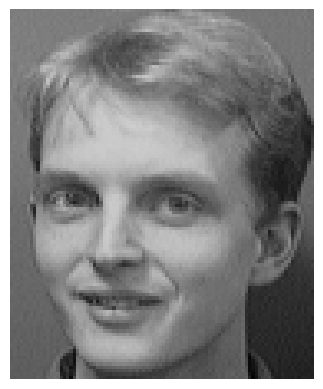

Images shape: (400, 10304)
Labels shape: (400, 1)


In [4]:
# pip install natsort 
from natsort import natsorted

all_images = []
all_labels = []

entries = os.listdir("dataset")
# Natsort is used to sort the images in the order of their names which the normal sort fails to do
entries = natsorted(entries)
for i,entry in enumerate(entries):
    images = os.listdir("dataset/"+entry)
    images = natsorted(images)
    for image in images:
        # Reading the image and converting it to grayscale
        img = cv2.imread("dataset/"+entry+"/"+image,cv2.IMREAD_GRAYSCALE)
        # Flastten / normalize the image
        all_images.append(img.flatten()/255)
        all_labels.append(i+1)
    show_image(img)

# Generating Data matrix
all_images = np.array(all_images)
all_labels = np.array(all_labels)
all_labels=all_labels.reshape(all_labels.shape[0],-1)

print(f"Images shape: {all_images.shape}")
print(f"Labels shape: {all_labels.shape}")

In [5]:
# Splitting the data into train and test (Odd images for training and even images for testing) <<-- This is a bad way to do it
Xtrain = all_images[1::2]
Ytrain = all_labels[1::2]
Xtest = all_images[0::2]
Ytest = all_labels[0::2]

print(f"Xtrain shape: {Xtrain.shape}")
print(f"Ytrain shape: {Ytrain.shape}")
print(f"Xtest shape: {Xtest.shape}")
print(f"Ytest shape: {Ytest.shape}")

Xtrain shape: (200, 10304)
Ytrain shape: (200, 1)
Xtest shape: (200, 10304)
Ytest shape: (200, 1)


In [6]:
Xtrain_transposed = Xtrain.transpose()
means = [np.mean(row) for row in Xtrain_transposed]
means = np.array(means)
print(f"Means shape: {means.shape}")

Means shape: (10304,)


In [7]:
Z = Xtrain - means
print(f"Z shape: {Z.shape}")
cov = 1/len(Xtrain) * np.matmul(Z.transpose(),Z)
print(f"Covariance shape: {cov.shape}")

Z shape: (200, 10304)
Covariance shape: (10304, 10304)


In [8]:
eig_values, eig_vectors = np.linalg.eigh(cov)
idx = eig_values.argsort()[::-1]  
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]

In [9]:
eig_values_sorted = sorted(eig_values,reverse=True)

In [10]:
def get_dimensions(eigen_values, alpha):
    total = eig_values.sum()
    sum=0
    for i,val in enumerate(eigen_values):
        sum+=val
        if sum/total >= alpha:
            break
    return i+1

In [11]:
alphas = [0.8,0.85,0.9,0.95]
r = [get_dimensions(eig_values_sorted,alpha) for alpha in alphas]
r

[37, 53, 77, 116]

c:\Users\eyada\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy for alpha =  0.8
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
 

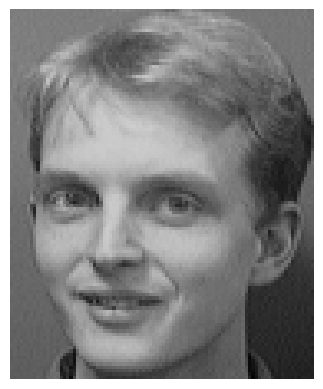

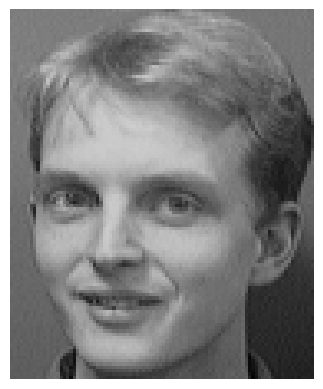

accuracy for alpha =  0.85
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.71      1.00      0.83         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5


c:\Users\eyada\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


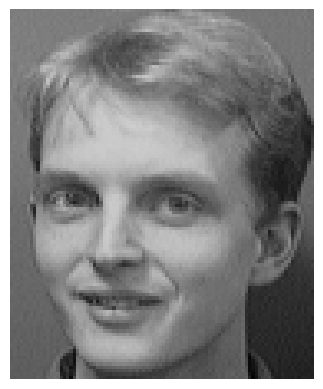

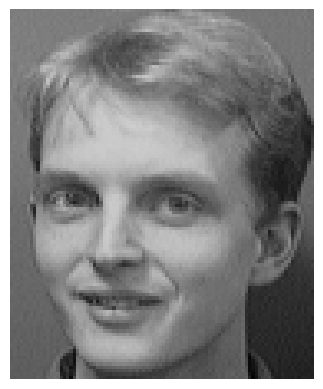

c:\Users\eyada\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy for alpha =  0.9
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.83      1.00      0.91         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
 

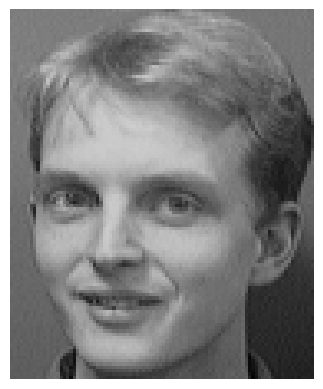

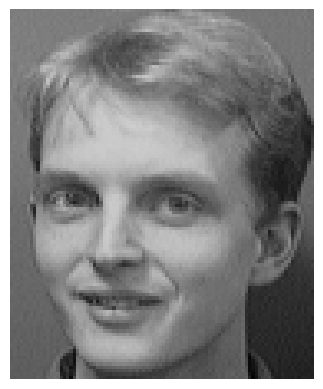

c:\Users\eyada\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy for alpha =  0.95
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.71      1.00      0.83         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         5
           5       0.62      1.00      0.77         5
           6       1.00      1.00      1.00         5
           7       0.83      1.00      0.91         5
           8       0.83      1.00      0.91         5
           9       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5


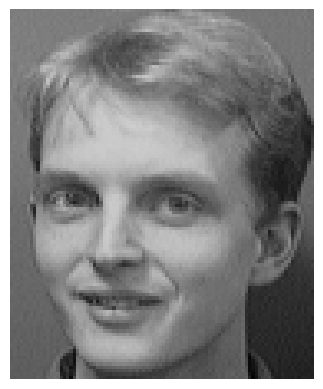

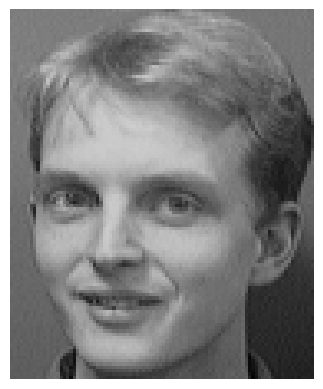

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

for x in range(len(r)):
    
    p_train_data = np.matmul(eig_vectors[:, 0:r[x]].T, Xtrain.T).T
    p_test_data = np.matmul(eig_vectors[:, 0:r[x]].T, Xtest.T).T

    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(p_train_data, Ytrain)

    y_pred=neigh.predict(p_test_data)

    print('accuracy for alpha = ',alphas[x])
    print(classification_report(Ytest, y_pred))
    show_image(y_pred)
    show_image(Ytest)